<a href="https://colab.research.google.com/github/Reyhaneh2001/forest_cover_type/blob/main/forest_cover_type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_auc_score, roc_curve, accuracy_score)
from sklearn.manifold import TSNE
import warnings
import shap
warnings.filterwarnings("ignore")

# **Load dataset**

In [2]:
data = fetch_covtype()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='Cover_Type')

print("Dataset shape:", X.shape)
print("Target classes:", y.unique())

Dataset shape: (581012, 54)
Target classes: [5 2 1 7 3 6 4]


# **Basic EDA**

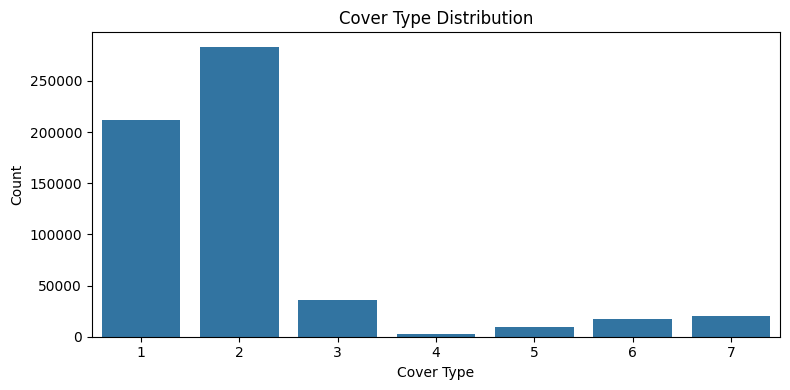

In [3]:
plt.figure(figsize=(8, 4))
sns.countplot(x=y)
plt.title('Cover Type Distribution')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# **Correlation heatmap**

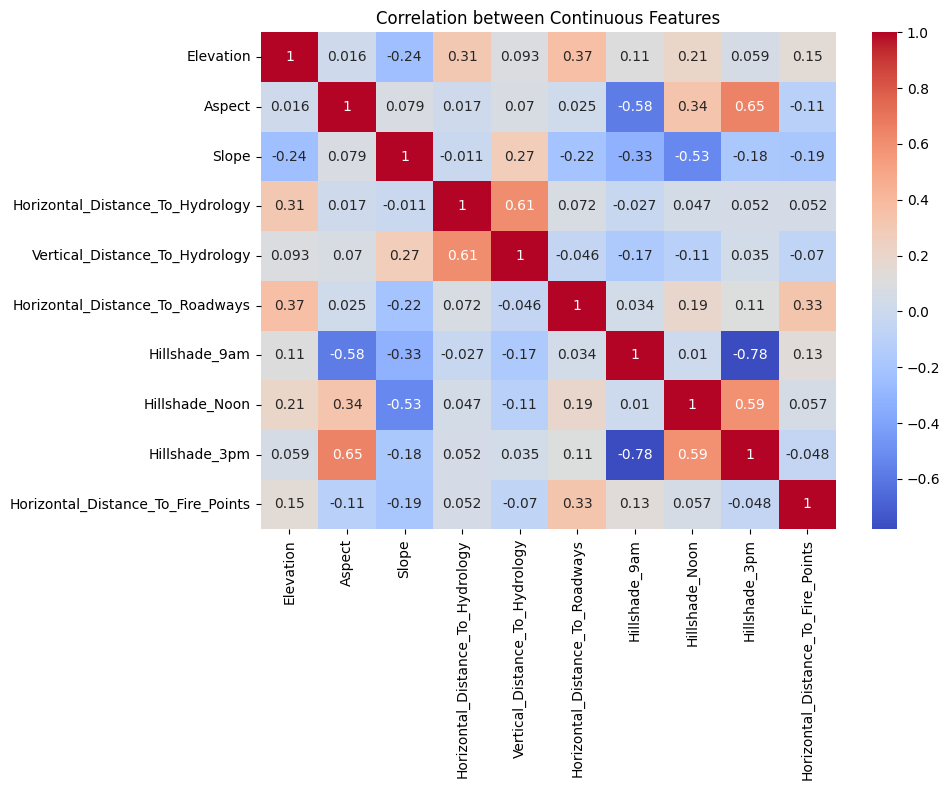

In [4]:
numeric_features = X.iloc[:, :10]  # first 10 are continuous
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Continuous Features")
plt.tight_layout()
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# **Build pipeline**

In [6]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
])

X_train_2D = pipeline.fit_transform(X_train)
X_test_2D = pipeline.transform(X_test)

# **Visualize in 2D (PCA)**

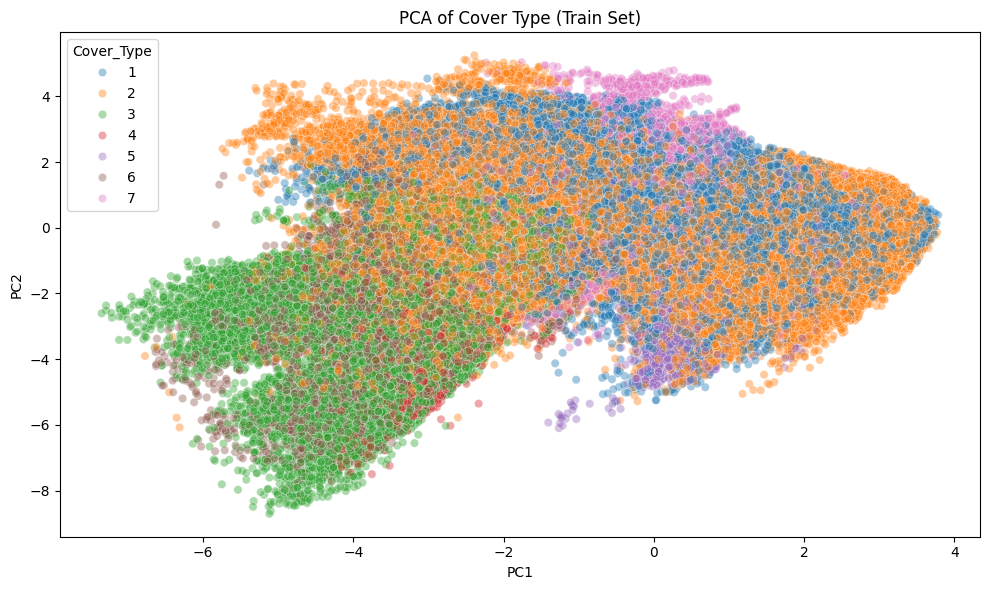

In [8]:
pca_df = pd.DataFrame(X_train_2D, columns=['PC1', 'PC2'])
pca_df['Cover_Type'] = y_train.reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cover_Type', palette='tab10', alpha=0.4)
plt.title('PCA of Cover Type (Train Set)')
plt.tight_layout()
plt.show()

# **Model training**

In [9]:
rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# **Evaluation**


Classification Report:

              precision    recall  f1-score   support

           1       0.83      0.78      0.81     42368
           2       0.81      0.89      0.85     56661
           3       0.86      0.89      0.87      7151
           4       0.90      0.74      0.81       549
           5       0.96      0.20      0.33      1899
           6       0.90      0.59      0.71      3473
           7       0.97      0.75      0.85      4102

    accuracy                           0.83    116203
   macro avg       0.89      0.69      0.75    116203
weighted avg       0.83      0.83      0.82    116203



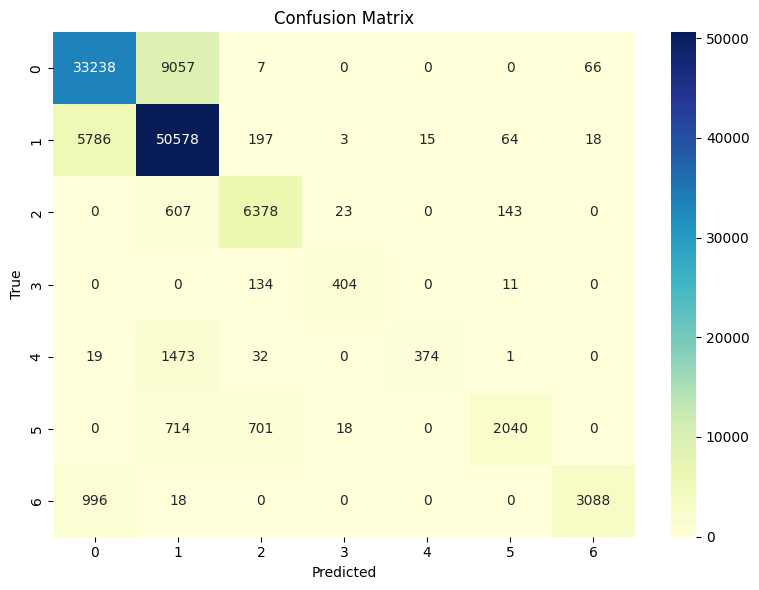

In [10]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

# **Feature importance**

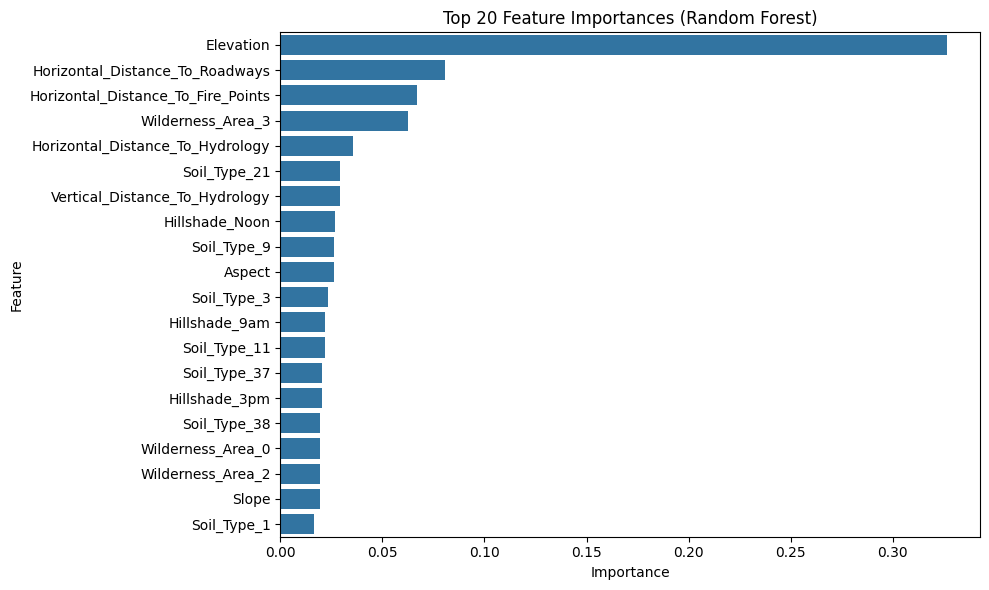

In [11]:
importances = rf.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Top 20 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

# **Accuracy**

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8270010240699466


# **Shap plot**

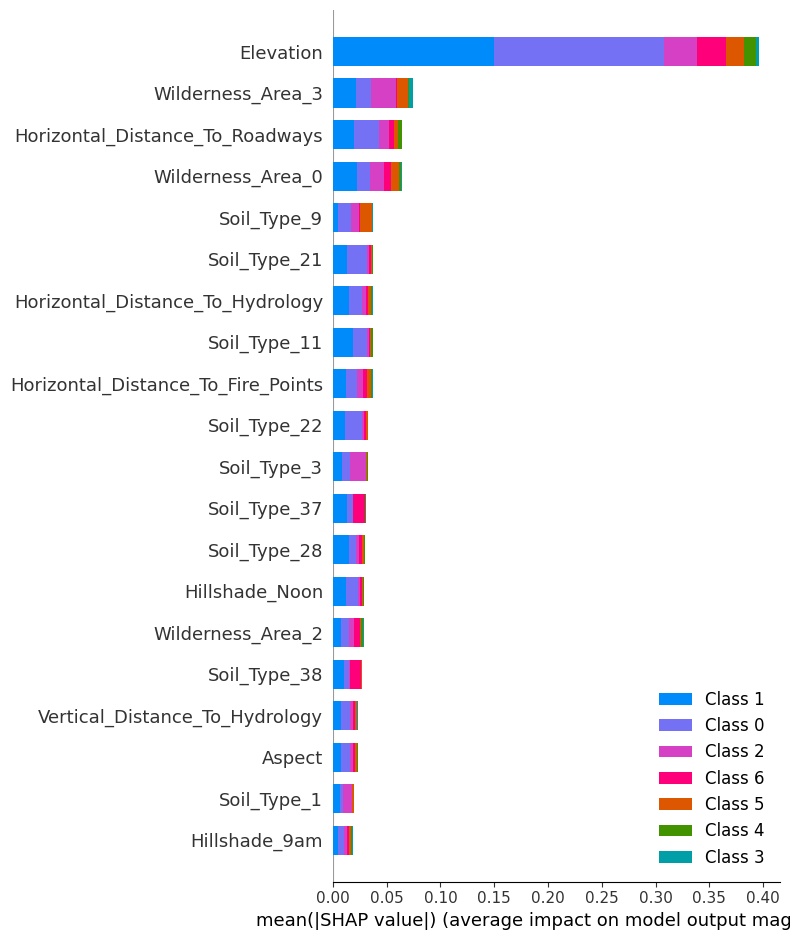

<Figure size 640x480 with 0 Axes>

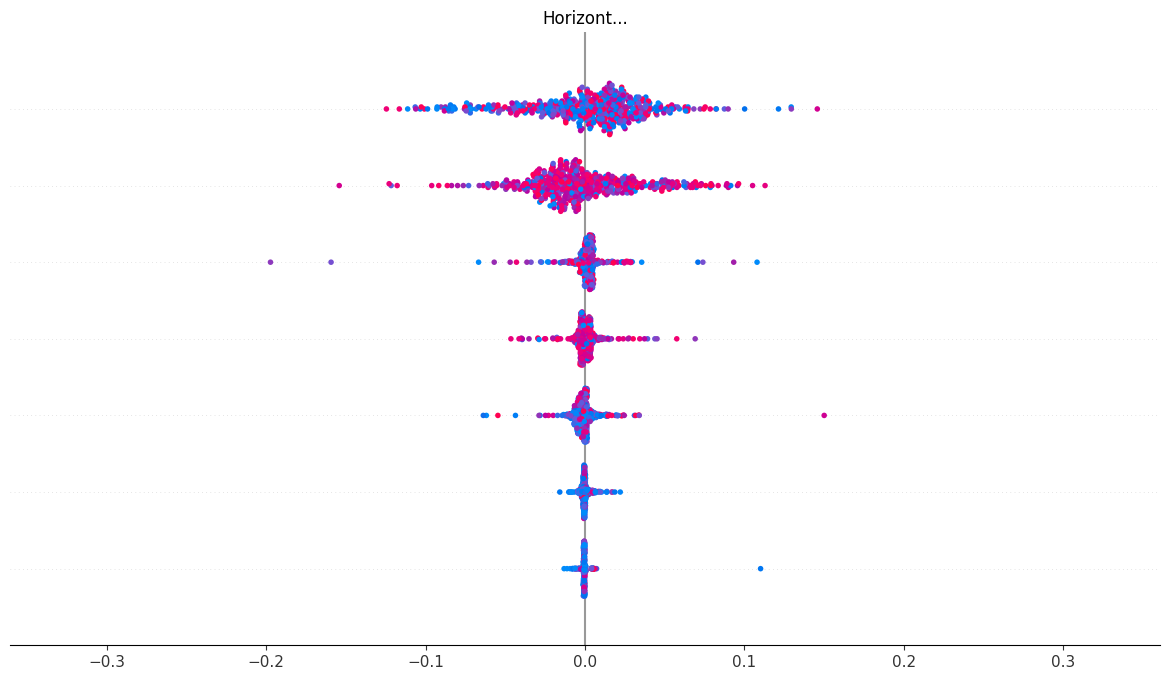

In [18]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train.sample(500))

plt.figure()
shap.summary_plot(shap_values, X_train.sample(500), plot_type='bar')
plt.show()

shap.summary_plot(shap_values, X_train.sample(500))